In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
import multiprocessing
import time
import numpy as np
import scipy as sp
import emcee
import sys
import pickle
import taumod
from scipy import interpolate 
from IPython.display import display
%matplotlib inline

In [2]:
ndim= 3
nwalkers = 300

In [3]:
with open('Mg2SiO4_tau_retrieval.pic', 'rb') as input:
    fostchain,fostlnprob = pickle.load(input) 
fostsamples = fostchain[:, 1500:, :].reshape((-1, ndim))   
fostprob  = fostlnprob[:,1500:].reshape((-1))
print fostsamples.shape

(150000, 3)


In [4]:
with open('MgSiO3_tau_retrieval.pic', 'rb') as input:
    enstchain,enstlnprob = pickle.load(input) 
enstsamples = enstchain[:, 1500:, :].reshape((-1, ndim))  
enstprob  = enstlnprob[:,1500:].reshape((-1))
print enstsamples.shape

(150000, 3)


In [5]:
#with open('Min_MgSiO3_tau_retrieval.pic', 'rb') as input:
#    minenstchain,minenstlnprob = pickle.load(input) 
#minenstsamples = minenstchain[:, 500:, :].reshape((-1, ndim))  
#minenstprob  = minenstlnprob[:,500:].reshape((-1))
#print minenstsamples.shape

In [6]:
with open('Fe_tau_retrieval.pic', 'rb') as input:
    fechain,felnprob = pickle.load(input) 
fesamples = fechain[:, 8500:, :].reshape((-1, ndim)) 
feprob  = felnprob[:,8500:].reshape((-1))
print fesamples.shape

(150000, 3)


In [7]:
#with open('Min_Fe_tau_retrieval.pic', 'rb') as input:
#    minfechain,minfelnprob = pickle.load(input) 
#minfesamples = minfechain[:, 1500:, :].reshape((-1, ndim)) 
#minfeprob  = minfelnprob[:,1500:].reshape((-1))
#print minfesamples.shape

In [8]:
fetheta = np.asfortranarray(fesamples[np.argmax(feprob)],dtype='float64')
print fesamples[np.argmax(feprob)], np.amax(feprob)
fosttheta = np.asfortranarray(fostsamples[np.argmax(fostprob)],dtype='float64')
ensttheta = np.asfortranarray(enstsamples[np.argmax(enstprob)],dtype='float64')
#minfetheta = np.asfortranarray(minfesamples[np.argmax(minfeprob)],dtype='float64')
#minensttheta= np.asfortranarray(minenstsamples[np.argmax(minenstprob)],dtype='float64')
print fostsamples[np.argmax(fostprob)], np.amax(fostprob)
print enstsamples[np.argmax(enstprob)], np.amax(enstprob)
#print minfesamples[np.argmax(minfeprob)], np.amax(minfeprob)
#print minenstsamples[np.argmax(minenstprob)], np.amax(minenstprob)

[  3.01046745e-02   2.76320857e+00   1.54183157e+11] -117.038065404
[  4.43847301e-01   1.05239662e+00   1.39896940e+12] -127.689878963
[  4.13782984e-01   2.08205128e-01   5.24182388e+10] -126.573929889


In [9]:
wave  = np.arange(0.7,2.5,0.01)
with open('run_analysis/2M2224_powcloud_RFalks_ext.pk1', 'rb') as input:
    sampler = pickle.load(input) 
print sampler.chain.shape
nwalkers = sampler.chain.shape[0]
niter = sampler.chain.shape[1]
ndim = sampler.chain.shape[2]
samples = sampler.chain[:,niter-1000:,:].reshape((-1,ndim))
cloudsamples = samples[:,ndim-10:ndim-5]
sid = np.zeros(5000)
tausamp = np.zeros([5000,wave.size])
for i in range (0,5000):
    sid[i]= np.random.randint(0,high = len(samples))
    cloudsamp = samples[sid[i],ndim-10:ndim-5]
    tau_0 = cloudsamp[0]
    tpow = cloudsamp[4]
    tausamp[i,:] = tau_0 * np.power(wave,tpow)
tauspec = np.median(tausamp,0)
tauerr = np.std(tausamp,0)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(384, 20000, 24)


In [10]:
sizdist = 2
fewave, fetau = taumod.cloudtau(fetheta,"Fe",sizdist)
fewave = fewave[::-1]
fetau = fetau[::-1]

fetesttau = np.zeros([5000,fewave.size])
ensttesttau = np.zeros([5000,fewave.size])
fosttesttau  = np.zeros([5000,fewave.size])


for i in range (0,5000):
    sid[i]= np.random.randint(0,high = len(fesamples))
    testtheta = np.asfortranarray(fesamples[sid[i],:],dtype='float64')
    testwave,fetesttau[i,:] = taumod.cloudtau(testtheta,"Fe",sizdist)
    #plt.plot(testwave,testtau,'r-',alpha=0.1)
    testtheta = np.asfortranarray(fostsamples[sid[i],:],dtype='float64')
    testwave, fosttesttau[i,:] = taumod.cloudtau(testtheta,"Mg2SiO4",sizdist)
    #plt.plot(testwave,testtau,'c-',alpha=0.1)
    testtheta = np.asfortranarray(enstsamples[sid[i],:],dtype='float64')
    testwave, ensttesttau[i,:] = taumod.cloudtau(testtheta,"MgSiO3",sizdist)
    #plt.plot(testwave,testtau,'m-',alpha=0.1)




/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [11]:
fetauspec = np.mean(fetesttau,0)
fetauerr = np.std(fetesttau,0)
fosttauspec = np.median(fosttesttau,0)
fosttauerr = np.std(fosttesttau,0)
ensttauspec = np.median(ensttesttau,0)
ensttauerr = np.std(ensttesttau,0)
print fetauspec
print fetauerr

[  2.19649439e-03   5.58137921e-03   1.59700590e-02   4.06399990e-02
   9.59641906e-02   1.52290983e-01   1.91086647e-01   2.31582264e-01
   2.64174949e-01   2.85005517e-01   2.96017862e-01   3.02344441e-01
   3.08552834e-01   3.14452437e-01   3.20113475e-01   3.24390788e-01
   3.27410622e-01   3.30232497e-01   3.32806650e-01   3.35205378e-01
   3.37792826e-01   3.39819731e-01   3.41272730e-01   3.43107549e-01
   3.44914948e-01   3.46850216e-01   3.48433061e-01   3.49425672e-01
   3.50533033e-01   3.51910770e-01   3.53346085e-01   3.54743858e-01
   3.56647912e-01   3.58632694e-01   3.60898833e-01   3.64525996e-01
   3.67185801e-01   3.68890264e-01   3.71207154e-01   3.74792304e-01
   3.79102694e-01   3.81932483e-01   3.85172290e-01   3.89727424e-01
   3.93773844e-01   3.95776888e-01   3.96940286e-01   3.98713776e-01
   4.00707173e-01   4.02269455e-01   4.04692650e-01   4.09238433e-01
   4.14510895e-01   4.19397987e-01   4.24962119e-01   4.32837800e-01
   4.41529078e-01   4.49376876e-01

In [12]:
nsamps = fesamples.shape[0]
fetausamp = np.empty([nsamps,fewave.size])
for i in range(0,nsamps):
    testwave,fetausamp[i,:] = taumod.cloudtau(fesamples[i,:],"Fe",sizdist)


KeyboardInterrupt: 

In [ ]:
fetest = np.empty([3,testwave.size])
for i in range(0,testwave.size):
    junk = fetausamp[:,i]
    junk2 = np.percentile(junk, [16, 50, 84],axis=0)
    junk3 = np.array(junk2)
    fetest[:,i] = junk3[:]

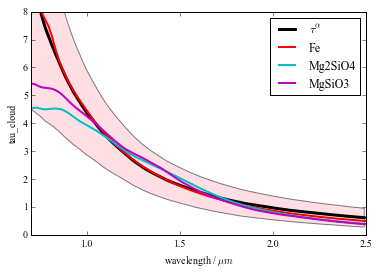

In [16]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
plt.axis([0.7, 2.5,0.,8.])
#for i in range (0,2000):
#    sid[i]= np.random.randint(0,high = len(samples))
#    cloudsamp = samples[sid[i],ndim-10:ndim-5]
#    tau_0 = cloudsamp[0]
#    tpow = cloudsamp[4]
#    tauplot = tau_0 * np.power(wave,tpow)
#    plt.plot(wave,tauplot,'k-',alpha =0.1)





c1, = plt.plot(wave,tauspec,'k-',linewidth=3,label=(r'$\tau^{\alpha}$'))
plt.fill_between(wave,(tauspec-tauerr),(tauspec+tauerr),facecolor='pink',alpha=(0.5))


fewave, fetau = taumod.cloudtau(fetheta,"Fe",sizdist)
#fewave = fewave[::-1]
#fetau = fetau[::-1]
c2, = plt.plot(testwave,fetau,'r-',linewidth=2,label=('Fe'))
#plt.fill_between(testwave,(fetest[0,:]),(fetest[2,:]),facecolor='blue',alpha=(0.5))
#plt.plot(testwave,fetest[1,:],'c-')
fostwave, fosttau = taumod.cloudtau(fosttheta,"Mg2SiO4",sizdist)
#fostwave = fostwave[::-1]
#fosttau = fosttau[::-1]
c3, = plt.plot(fostwave,fosttau,'c-',linewidth=2,label=('Mg2SiO4'))
#plt.fill_between(testwave,(fosttauspec-fosttauerr),(fosttauspec+fosttauerr),facecolor='cyan',alpha=(0.5))


enstwave, ensttau = taumod.cloudtau(ensttheta,"MgSiO3",sizdist)
#enstwave = enstwave[::-1]
#ensttau = ensttau[::-1]
c4, = plt.plot(enstwave,ensttau,'m-',linewidth=2,label=('MgSiO3'))
#plt.fill_between(testwave,(ensttauspec-ensttauerr),(ensttauspec+ensttauerr),facecolor='magenta',alpha=(0.5))


#minfewave, minfetau = taumod.cloudtau(minfetheta,"Fe",1)
#minfewave = minfewave[::-1]
#minfetau = minfetau[::-1]
#plt.plot(minfewave,minfetau,'k-')


#minenstwave, minensttau = taumod.cloudtau(minensttheta,"MgSiO3",1)
#minenstwave = minenstwave[::-1]
#minensttau = minensttau[::-1]
#plt.plot(minenstwave,minensttau,'r-')

plt.legend(handles=[c1,c2,c3,c4])




plt.ylabel(r'tau_cloud')
plt.xlabel('wavelength / $\mu m$')
#plt.savefig('2M2224_tau_fit.png',format='png', dpi=720)

In [ ]:
print minfetau